In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/global-student-migration-and-higher-education-trends/global_student_migration.csv


## Getting to know the dataset

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('/kaggle/input/global-student-migration-and-higher-education-trends/global_student_migration.csv')

In [3]:
df.head()

,student_id,origin_country,destination_country,destination_city,university_name,course_name,field_of_study,year_of_enrollment,scholarship_received,enrollment_reason,graduation_year,placement_status,placement_country,placement_company,starting_salary_usd,gpa_or_score,visa_status,post_graduation_visa,language_proficiency_test,test_score
0,S00001,Finland,Russia,Moscow,Lomonosov Moscow State University,Computer Science,Engineering,2021,No,Higher Ranking,2024,Placed,Russia,Microsoft,36416,3.92,Tier 4,Work Permit,TOEFL,7.8
1,S00002,UK,Germany,Aachen,RWTH Aachen,Civil Engineering,Law,2023,Yes,Job Opportunities,2024,Placed,Germany,Google,32956,2.60,Study Permit,OPT,PTE,7.9
2,S00003,Ireland,Canada,Vancouver,University of British Columbia,Law,Arts,2019,No,Scholarship,2020,Not Placed,NaN,NaN,0,2.72,F1,Blue Card,NaN,0.0
3,S00004,UAE,UK,Birmingham,University of Birmingham,Data Science,Social Sciences,2021,Yes,Quality of Life,2023,Placed,UK,Apple,50892,3.71,Schengen Student Visa,PSW,NaN,0.0
4,S00005,South Africa,Germany,Stuttgart,University of Stuttgart,Business Administration,Law,2020,Yes,Political Stability,2021,Placed,Germany,IBM,54790,2.96,Schengen Student Visa,OPT,PTE,8.2


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   student_id                 5000 non-null   object 
 1   origin_country             5000 non-null   object 
 2   destination_country        5000 non-null   object 
 3   destination_city           5000 non-null   object 
 4   university_name            5000 non-null   object 
 5   course_name                5000 non-null   object 
 6   field_of_study             5000 non-null   object 
 7   year_of_enrollment         5000 non-null   int64  
 8   scholarship_received       5000 non-null   object 
 9   enrollment_reason          5000 non-null   object 
 10  graduation_year            5000 non-null   int64  
 11  placement_status           5000 non-null   object 
 12  placement_country          2509 non-null   object 
 13  placement_company          2509 non-null   objec

In [5]:
df.describe()

,year_of_enrollment,graduation_year,starting_salary_usd,gpa_or_score,test_score
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,2021.011000,2023.017800,44552.531000,3.246820,5.632200
std,1.420733,1.651432,50719.190623,0.430659,2.973838
min,2019.000000,2020.000000,0.000000,2.500000,0.000000
25%,2020.000000,2022.000000,0.000000,2.877500,5.300000
50%,2021.000000,2023.000000,30516.500000,3.240000,6.500000
75%,2022.000000,2024.000000,87838.500000,3.610000,7.800000
max,2023.000000,2026.000000,149932.000000,4.000000,9.000000


In [6]:
df.isnull().sum()

student_id                      0
origin_country                  0
destination_country             0
destination_city                0
university_name                 0
course_name                     0
field_of_study                  0
year_of_enrollment              0
scholarship_received            0
enrollment_reason               0
graduation_year                 0
placement_status                0
placement_country            2491
placement_company            2491
starting_salary_usd             0
gpa_or_score                    0
visa_status                     0
post_graduation_visa            0
language_proficiency_test     982
test_score                      0
dtype: int64

## Is Computer Science still the most attractive field?

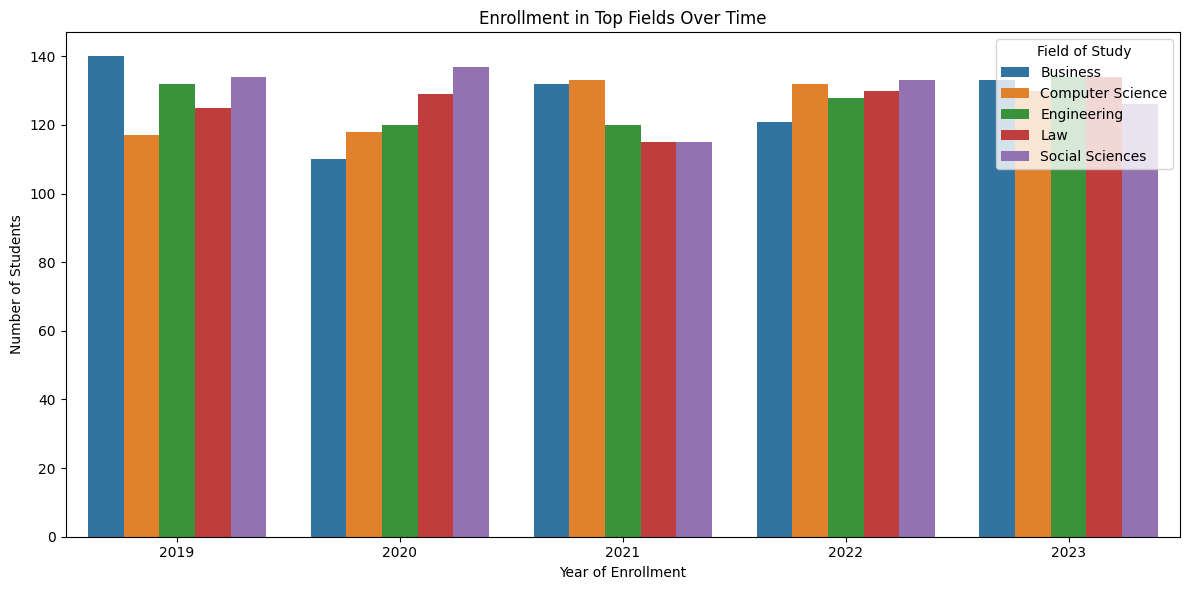

In [7]:
field_trend = df.groupby(['year_of_enrollment', 'field_of_study']).size().reset_index(name='student_count')
top_fields = df['field_of_study'].value_counts().nlargest(5).index.tolist()
filtered = field_trend[field_trend['field_of_study'].isin(top_fields)]
plt.figure(figsize=(12,6))
sns.barplot(data=filtered, x='year_of_enrollment', y='student_count', hue='field_of_study')
plt.title("Enrollment in Top Fields Over Time")
plt.xlabel("Year of Enrollment")
plt.ylabel("Number of Students")
plt.legend(title="Field of Study")
plt.tight_layout()
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


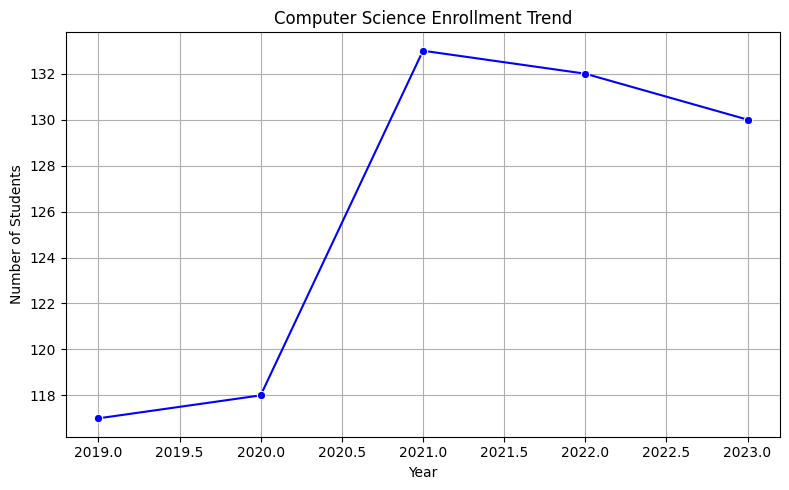

In [8]:
cs_trend = field_trend[field_trend['field_of_study'].str.contains('Computer Science', case=False)]

plt.figure(figsize=(8,5))
sns.lineplot(data=cs_trend, x='year_of_enrollment', y='student_count', marker='o', color='blue')
plt.title('Computer Science Enrollment Trend')
plt.xlabel('Year')
plt.ylabel('Number of Students')
plt.grid(True)
plt.tight_layout()
plt.show()

Between 2019 and 2020, enrollment was fairly flat. However, in 2021, it reached its peak, possibly due to post-COVID rebound or online learning flexibilities. And,slowly, it started to decrease - maybe because people are branching out into niche tech fields like AI or Cybersecurity?

## Inbound international students for all destination countries by year

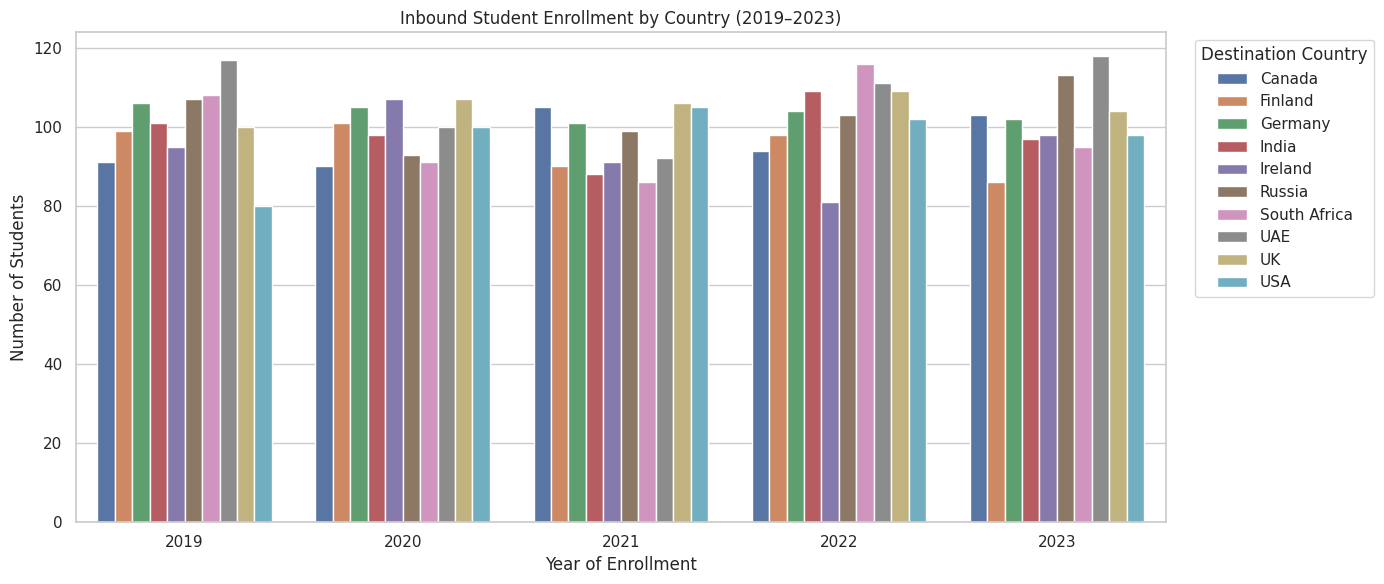

In [9]:
country_trend = df.groupby(['year_of_enrollment', 'destination_country']).size().reset_index(name='student_count')
sns.set(style="whitegrid")
plt.figure(figsize=(14,6))


sns.barplot(
    data=country_trend,
    x='year_of_enrollment',
    y='student_count',
    hue='destination_country'
)


plt.title("Inbound Student Enrollment by Country (2019–2023)")
plt.xlabel("Year of Enrollment")
plt.ylabel("Number of Students")
plt.legend(title="Destination Country", bbox_to_anchor=(1.02, 1), loc='upper left')
plt.tight_layout()
plt.show()

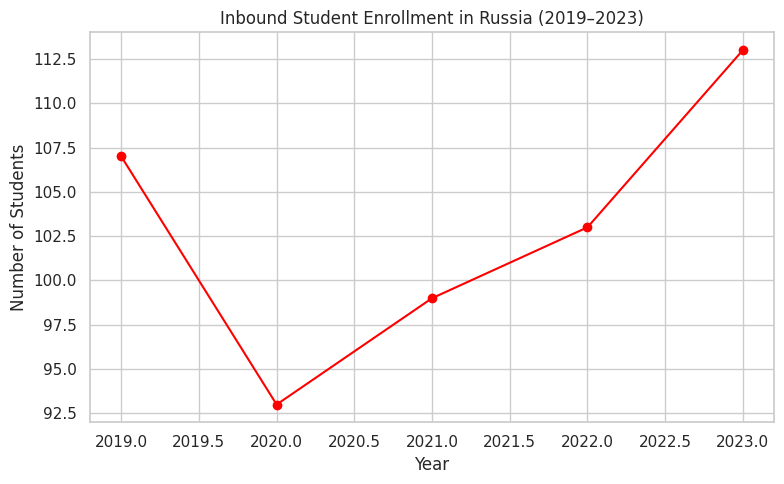

In [10]:
russia_trend = country_trend[country_trend['destination_country']=='Russia']
plt.figure(figsize=(8,5))
plt.plot(russia_trend['year_of_enrollment'], russia_trend['student_count'], marker='o', color='red')
plt.title("Inbound Student Enrollment in Russia (2019–2023)")
plt.xlabel("Year")
plt.ylabel("Number of Students")
plt.grid(True)
plt.tight_layout()
plt.show()

There have been noticeable fluctuations in international student enrollment across the 10 countries. Many saw a dip during 2020–2021, likely due to the COVID-19 pandemic. Some countries, like Ireland in 2022 and Finland in 2023, also experienced declines that may be linked to local or global events. On the other hand, the UAE stood out as the top destination in 2023, with consistently high numbers in previous years as well. This trend may reflect the country's growing appeal — such as the availability of English-taught programs and strong opportunities for international students.

## Attractive countries: pre and post Covid 19

In [11]:
pre_covid = country_trend[country_trend['year_of_enrollment'].isin([2019, 2020])]
post_covid = country_trend[country_trend['year_of_enrollment'].isin([2021, 2022, 2023])]

In [12]:
pre_avg = pre_covid.groupby('destination_country')['student_count'].mean().reset_index(name='pre_covid_avg')
post_avg = post_covid.groupby('destination_country')['student_count'].mean().reset_index(name='post_covid_avg')

In [13]:
comparison = pd.merge(pre_avg, post_avg, on='destination_country')
comparison['change'] = comparison['post_covid_avg'] - comparison['pre_covid_avg']
comparison = comparison.sort_values('change', ascending=False)

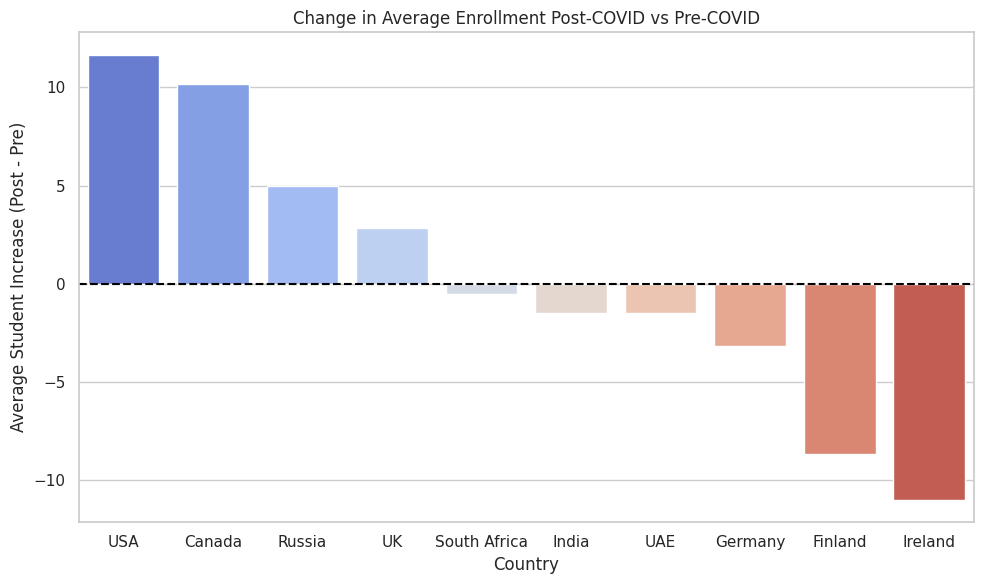

In [14]:
plt.figure(figsize=(10,6))
sns.barplot(data=comparison, x='destination_country', y='change', palette='coolwarm')
plt.axhline(0, color='black', linestyle='--')
plt.title("Change in Average Enrollment Post-COVID vs Pre-COVID")
plt.ylabel("Average Student Increase (Post - Pre)")
plt.xlabel("Country")
plt.tight_layout()
plt.show()

Some countries bounced back post-COVID — others didn’t.
USA and Canada saw clear growth in international student interest, while countries like Ireland and Finland experienced a drop.
This could reflect differences in visa policies, global reputation, and how countries responded to the pandemic.

## Are students from developing countries shifting their study destinations?

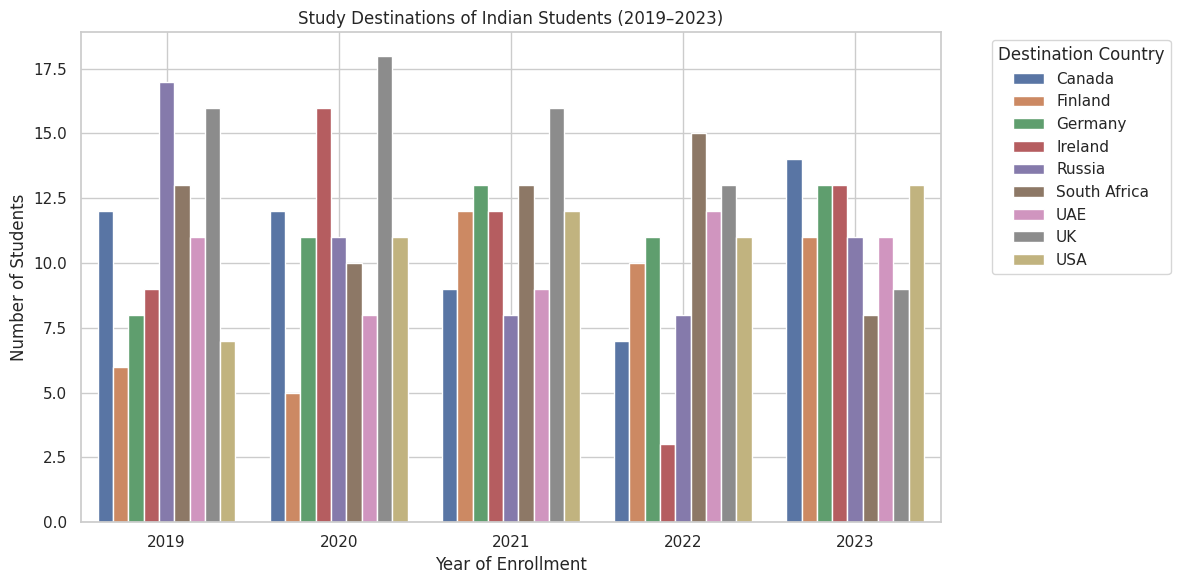

In [15]:
india_df = df[df['origin_country'].str.lower() == 'india']
india_trend = india_df.groupby(['year_of_enrollment', 'destination_country']).size().reset_index(name='student_count')
sns.set(style="whitegrid")
custom_palette = sns.color_palette("tab10")
plt.figure(figsize=(12,6))
sns.barplot(
    data=india_trend,
    x='year_of_enrollment',
    y='student_count',
    hue='destination_country'
)

plt.title("Study Destinations of Indian Students (2019–2023)")
plt.xlabel("Year of Enrollment")
plt.ylabel("Number of Students")
plt.legend(title="Destination Country", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

Indian students have shifted their study destinations in recent years.
Russia and Ireland saw major drops in 2022, likely due to global events, while the UK and UAE continued to rise in popularity.
The overall trend suggests that students are favoring more politically stable and opportunity-rich countries post-COVID and post-conflict.

## What are the most common reasons students go abroad to study?

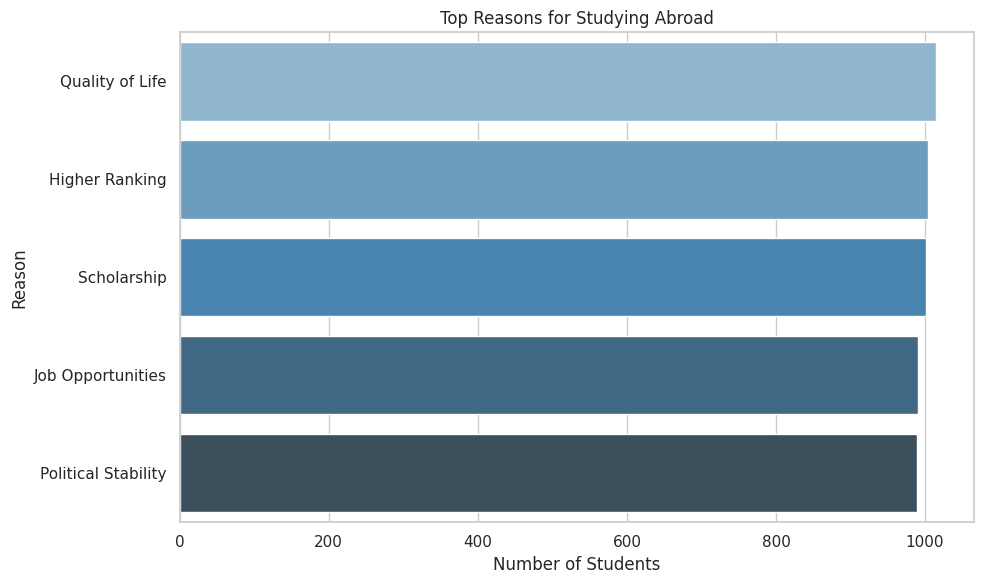

In [16]:
reason_counts = df['enrollment_reason'].value_counts().reset_index()
reason_counts.columns = ['reason', 'count']
plt.figure(figsize=(10,6))
sns.barplot(data=reason_counts, y='reason', x='count', palette='Blues_d')
plt.title("Top Reasons for Studying Abroad")
plt.xlabel("Number of Students")
plt.ylabel("Reason")
plt.tight_layout()
plt.show()